# Source Counts

In [1]:
# imports
import numpy as np
import scipy

import seaborn as sns
import pandas

from matplotlib import pyplot as plt

from astr234 import plotting 
import powerlaw

# Problem

## A)  Simulate a universe with randomly located galaxies inside a radius of r=1 and galaxies that are all L=1. Observe the simulated universe with a telescope that is sensitive to F=0.1L/r^2 and plot a histogram of source counts as a function of F

## Rejection sampling for galaxies in a sphere

In [2]:
nsample = 10**6
x = np.random.uniform(size=nsample)
y = np.random.uniform(size=nsample)
z = np.random.uniform(size=nsample)

In [3]:
keep = x**2 + y**2 + z**2 < 1

In [4]:
r = np.sqrt(x[keep]**2 + y[keep]**2 + z[keep]**2)

In [5]:
L = 1

In [6]:
F = 0.1 * L / r**2

## Plot

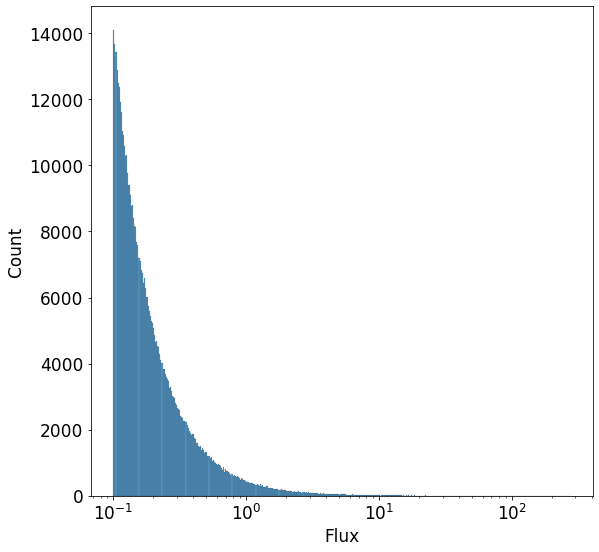

In [7]:
plt.figure(figsize=(9,9))
plt.clf()
ax = plt.gca()

sns.histplot(x=F, log_scale=(True,False), ax=ax)

ax.set_xlabel('Flux')
plotting.set_fontsize(ax, 17)
plt.show()

# B

## Repeat the previous part but assigning galaxy luminosities at random following a power law in luminosity with slope=-3

## Such a power law blows up if we let $L \to \infty$

### So, set $L_{\rm max} = 10^3$

### And use:

https://stackoverflow.com/questions/17882907/python-scipy-stats-powerlaw-negative-exponent

and

https://github.com/jeffalstott/powerlaw

## Inverse sample

In [8]:
L = powerlaw.Power_Law(xmin=1e-3, parameters=[-2]).generate_random(nsample)

In [10]:
F = 0.1 * L[keep] / r**2

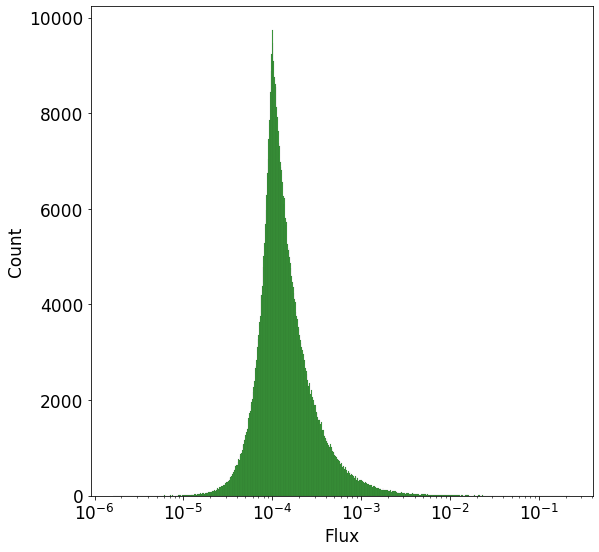

In [11]:
plt.figure(figsize=(9,9))
plt.clf()
ax = plt.gca()

sns.histplot(x=F, log_scale=(True,False), ax=ax, color='g')

ax.set_xlabel('Flux')
plotting.set_fontsize(ax, 17)
plt.show()